---

## Dataset Description and Machine Learning Problem

### Overview

The competition aims to **predict the transaction price of used cars** based on their various features.  
The dataset is provided by a major online used car trading platform and contains **over 400,000 transaction records**.  
It includes **31 columns (features)**, of which **15 are anonymized variables** (`v_0` to `v_14`).

To ensure fairness, the data has been split as follows:
- **Training set:** 150,000 samples  
- **Test set A:** 50,000 samples  
- **Test set B:** 50,000 samples  

Additionally, identifiers such as `name`, `model`, `brand`, and `regionCode` have been **desensitized (anonymized)** for privacy protection.

---

### Objective

Develop and optimize a regression model capable of accurately predicting the transaction prices of used cars using both the **explicit features** (e.g., power, kilometer, body type) and the **anonymous features** ($v_0$–$v_{14}$), while minimizing the MAE score on the test sets.

---

### Feature Description

| Feature Name | Description |
|---------------|-------------|
| SaleID | Unique ID of the sales record |
| name | Vehicle code |
| regDate | Vehicle registration date |
| model | Model code |
| brand | Brand of the vehicle |
| bodyType | Body type (e.g., sedan, SUV, etc.) |
| fuelType | Type of fuel used (e.g., gasoline, diesel, etc.) |
| gearbox | Type of transmission (manual/automatic) |
| power | Engine power |
| kilometer | Total mileage (in kilometers) |
| notRepairedDamage | Indicates whether there is unrepaired damage |
| regionCode | Encoded region where the vehicle is sold |
| seller | Seller type |
| offerType | Offer type |
| creatDate | Date when the ad was published |
| price | **Target variable** – transaction price of the vehicle |
| $v_0$ to $v_{14}$ | Anonymous numerical features representing hidden patterns or composite variables |

---

### Machine Learning Task

This is a **supervised regression problem**, where the goal is to predict the **used car price (`price`)** based on all other available features.

The evaluation metric for the competition is **Mean Absolute Error (MAE)**, defined as:

$$
MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

where  
- $y_i$ = true price of the $i^{th}$ car  
- $\hat{y}_i$ = predicted price of the $i^{th}$ car  
- $n$ = total number of cars in the test set

A **lower MAE** indicates better model performance.

---

### Evaluation Metric: MAE (Mean Absolute Error)

If the true values are

$$
y = (y_1, y_2, \cdots, y_n)
$$


and the predicted values from the model are

$$
\hat{y} = (\hat{y}_1, \hat{y}_2, \cdots, \hat{y}_n)
$$


then the **Mean Absolute Error (MAE)** of this model is calculated as follows:

$$
MAE = \frac{\sum_{i=1}^{n} |y_i - \hat{y}_i|}{n}
$$
### Interpretation

The smaller the MAE, the more accurate the model’s predictions are.


### Example

If the true values are

$$
y = (15, 20, 12)
$$

and the predicted values are

$$
\hat{y} = (17, 24, 9)
$$

then the **MAE** of these predictions is:

$$
MAE = \frac{|15 - 17| + |20 - 24| + |12 - 9|}{3} = 3
$$


---

### Loading Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('used_car_train_20200313.csv')
df.head()

,SaleID name regDate model brand bodyType fuelType gearbox power kilometer notRepairedDamage regionCode seller offerType creatDate price v_0 v_1 v_2 v_3 v_4 v_5 v_6 v_7 v_8 v_9 v_10 v_11 v_12 v_13 v_14
0,0 736 20040402 30.0 6 1.0 0.0 0.0 60 12.5 0.0 ...
1,1 2262 20030301 40.0 1 2.0 0.0 0.0 0 15.0 - 43...
2,2 14874 20040403 115.0 15 1.0 0.0 0.0 163 12.5...
3,3 71865 19960908 109.0 10 0.0 0.0 1.0 193 15.0...
4,4 111080 20120103 110.0 5 1.0 0.0 0.0 68 5.0 0...


NOTE: 

The way to seperate columns:
1. test ',': sep=','
2. test 'Tab': sep='\t'
3. test ';': sep=';'
4. test ' ': sep=' '

In [3]:
df=pd.read_csv('used_car_train_20200313.csv',sep='\t')

In [4]:
df.head()

,SaleID name regDate model brand bodyType fuelType gearbox power kilometer notRepairedDamage regionCode seller offerType creatDate price v_0 v_1 v_2 v_3 v_4 v_5 v_6 v_7 v_8 v_9 v_10 v_11 v_12 v_13 v_14
0,0 736 20040402 30.0 6 1.0 0.0 0.0 60 12.5 0.0 ...
1,1 2262 20030301 40.0 1 2.0 0.0 0.0 0 15.0 - 43...
2,2 14874 20040403 115.0 15 1.0 0.0 0.0 163 12.5...
3,3 71865 19960908 109.0 10 0.0 0.0 1.0 193 15.0...
4,4 111080 20120103 110.0 5 1.0 0.0 0.0 68 5.0 0...


In [5]:
df=pd.read_csv('used_car_train_20200313.csv',sep=';')
df.head()

,SaleID name regDate model brand bodyType fuelType gearbox power kilometer notRepairedDamage regionCode seller offerType creatDate price v_0 v_1 v_2 v_3 v_4 v_5 v_6 v_7 v_8 v_9 v_10 v_11 v_12 v_13 v_14
0,0 736 20040402 30.0 6 1.0 0.0 0.0 60 12.5 0.0 ...
1,1 2262 20030301 40.0 1 2.0 0.0 0.0 0 15.0 - 43...
2,2 14874 20040403 115.0 15 1.0 0.0 0.0 163 12.5...
3,3 71865 19960908 109.0 10 0.0 0.0 1.0 193 15.0...
4,4 111080 20120103 110.0 5 1.0 0.0 0.0 68 5.0 0...


In [6]:
df=pd.read_csv('used_car_train_20200313.csv',sep=' ')
df.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


---

### Data explore

| Feature Name | Description |
|---------------|-------------|
| SaleID | Unique ID of the sales record |
| name | Vehicle code |
| regDate | Vehicle registration date |
| model | Model code |
| brand | Brand of the vehicle |
| bodyType | Body type (e.g., sedan, SUV, etc.) |
| fuelType | Type of fuel used (e.g., gasoline, diesel, etc.) |
| gearbox | Type of transmission (manual/automatic) |
| power | Engine power |
| kilometer | Total mileage (in kilometers) |
| notRepairedDamage | Indicates whether there is unrepaired damage |
| regionCode | Encoded region where the vehicle is sold |
| seller | Seller type |
| offerType | Offer type |
| creatDate | Date when the ad was published |
| price | **Target variable** – transaction price of the vehicle |
| $v_0$ to $v_{14}$ | Anonymous numerical features representing hidden patterns or composite variables |

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [8]:
df

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


In [9]:
df.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [10]:
len(df.columns)

31

In [11]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [12]:
display_all(df)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


In [13]:
df.shape

(150000, 31)

In [14]:
display_all(df.head().T)

,0,1,2,3,4
SaleID,0,1,2,3,4
name,736,2262,14874,71865,111080
regDate,20040402,20030301,20040403,19960908,20120103
model,30.0,40.0,115.0,109.0,110.0
brand,6,1,15,10,5
bodyType,1.0,2.0,1.0,0.0,1.0
fuelType,0.0,0.0,0.0,0.0,0.0
gearbox,0.0,0.0,0.0,1.0,0.0
power,60,0,163,193,68
kilometer,12.5,15.0,12.5,15.0,5.0


In [15]:
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SaleID,150000.0,NaN,NaN,NaN,74999.5,43301.414527,0.0,37499.75,74999.5,112499.25,149999.0
name,150000.0,NaN,NaN,NaN,68349.172873,61103.875095,0.0,11156.0,51638.0,118841.25,196812.0
regDate,150000.0,NaN,NaN,NaN,20034170.51218,53649.879255,19910001.0,19990912.0,20030912.0,20071109.0,20151212.0
model,149999.0,NaN,NaN,NaN,47.129021,49.53604,0.0,10.0,30.0,66.0,247.0
brand,150000.0,NaN,NaN,NaN,8.052733,7.864956,0.0,1.0,6.0,13.0,39.0
bodyType,145494.0,NaN,NaN,NaN,1.792369,1.76064,0.0,0.0,1.0,3.0,7.0
fuelType,141320.0,NaN,NaN,NaN,0.375842,0.548677,0.0,0.0,0.0,1.0,6.0
gearbox,144019.0,NaN,NaN,NaN,0.224943,0.417546,0.0,0.0,0.0,0.0,1.0
power,150000.0,NaN,NaN,NaN,119.316547,177.168419,0.0,75.0,110.0,150.0,19312.0
kilometer,150000.0,NaN,NaN,NaN,12.59716,3.919576,0.5,12.5,15.0,15.0,15.0


From here, we can see that 'seller' and ' offerType' are not usual

In [16]:
df["seller"].value_counts()

seller
0    149999
1         1
Name: count, dtype: int64

In [17]:
df["offerType"].value_counts()

offerType
0    150000
Name: count, dtype: int64

Because, these two variables's values are no use, so we delete them

In [18]:
del df["seller"]
del df["offerType"]

Recheck the shape

In [19]:
df.shape

(150000, 29)

In [20]:
df.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

<Axes: >

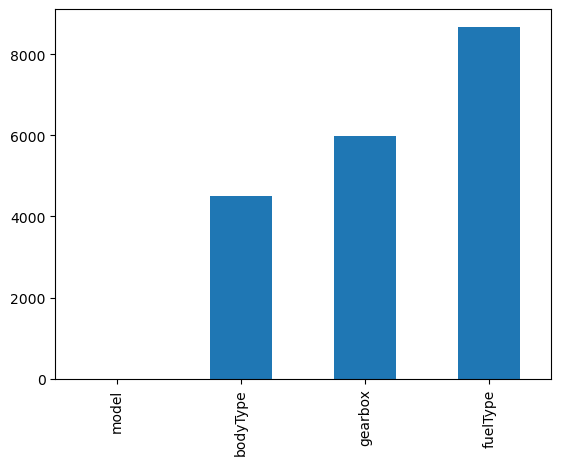

In [21]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  creatDate          150000 non-null  int64  
 13  price              150000 non-null  int64  
 14  v_0                150000 non-null  float64
 15  v_1                150000 non-null  float64
 16  v_

only 'notRepairedDamage' Dtype is Object

In [23]:
df['notRepairedDamage'].value_counts()

notRepairedDamage
0.0    111361
-       24324
1.0     14315
Name: count, dtype: int64

replace '-' by 'Nan'

In [24]:
df.replace({'notRepairedDamage': {'-': np.nan}}, inplace=True)

In [25]:
df['notRepairedDamage'].value_counts()

notRepairedDamage
0.0    111361
1.0     14315
Name: count, dtype: int64

In [26]:
df.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

Now see the distribution of Price

In [27]:
df['price']

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

In [28]:
df['price'].value_counts()

price
500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
9395        1
81900       1
16699       1
11998       1
14780       1
Name: count, Length: 3763, dtype: int64

C:\Users\cocol\AppData\Local\Temp\ipykernel_16748\159754407.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.norm)
C:\Users\cocol\AppData\Local\Temp\ipykernel_16748\159754407.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.lognorm)


<Axes: title={'center': 'Log Normal'}, xlabel='price'>

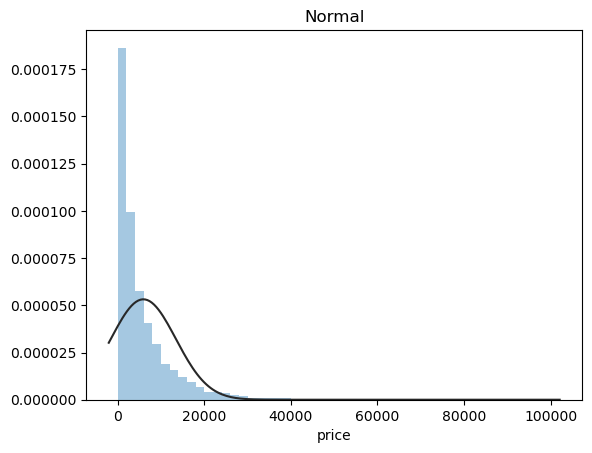

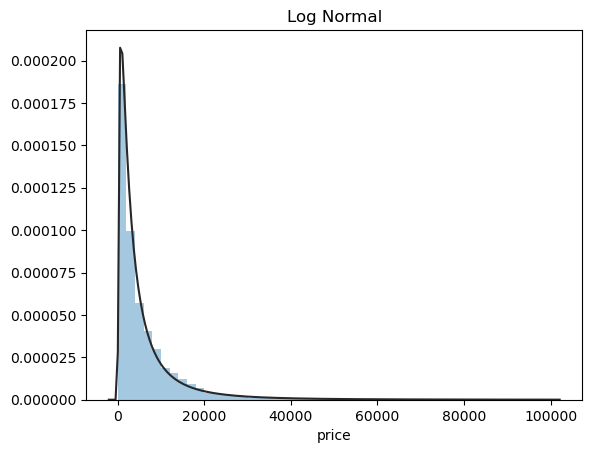

In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
y = df['price']
plt.figure(1)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(2)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

So, it doesn't follow a normal distribution

In [30]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]